## ECE 657A: Data and Knowledge Modelling and Analysis
### Assignment 1: Data Cleaning and Classification

#### Group 27 Submission
Ishpinder Kaur i7kaur@uwaterloo.ca\
Yuan Sun y228sun@uwaterloo.ca

In [150]:
# NumPy v1.20.3 https://numpy.org/
import numpy as np
# Pandas v1.2.4 https://pandas.pydata.org/
import pandas as pd
# Matplotlib v3.4.2 https://matplotlib.org/
import matplotlib.pyplot as plt
%matplotlib inline
# seaborn v0.11.1 https://seaborn.pydata.org/
import seaborn as sns
# scikit-learn v0.24.2 https://scikit-learn.org/
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve,auc
# SciPy v1.6.3 https://www.scipy.org/
from scipy.stats import zscore, kurtosis, skew
# Suppress warning messages for better readability
import warnings
warnings.filterwarnings('ignore')

#### Iris Dataset:
A sample dataset describing the features of three different flowers.

* Features:
    * Sepal Length = Length of sepal of a particular flower in cm.
    * Sepal Width = Width of sepal of a particular flower in cm.
    * Petal Length = Length of petal of a particular flower in cm.
    * Petal Width = Width of petal of a particular flower in cm.
* Categories:
    * Iris-Setosa
    * Iris-Versicolor
    * Iris-Virginica
* Numerical columns:
    * 'sepal_length'
    * 'sepal_width'
    * 'petal_length'
    * 'petal_width'
* Categorical column:
    * 'species'

#### Data Retrieval and Exploration:

In [151]:
df_iris=pd.read_csv('iris_dataset_missing.csv')
df=df_iris.copy()
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,105.000000,101.000000,97.000000,105.000000
mean,5.858909,3.059083,3.812370,1.199708
std,0.861638,0.455116,1.793489,0.787193
min,4.344007,1.946010,1.033031,-0.072203
25%,5.159145,2.768688,1.545136,0.333494
50%,5.736104,3.049459,4.276817,1.331797
75%,6.435413,3.290318,5.094427,1.817211
max,7.795561,4.409565,6.768611,2.603123


From description of dataset above, it is clear that the total number of rows and columns are 105 and 5, respectively. In which, there are 4 numerical columns and 1 categorical (target).

There are 35 dataset entries of each flower with their features as, **sepal_length**, **sepal_width**, **petal_length**, **petal_width**.

Although, it is visible that there are missing values in sepal_width and petal_length column. Also, there are negative values in petal_width column, which is invalid *(as length cannot be negative)*.

#### Pairplot to see comparison of these categories as well as their features (before any modifications):

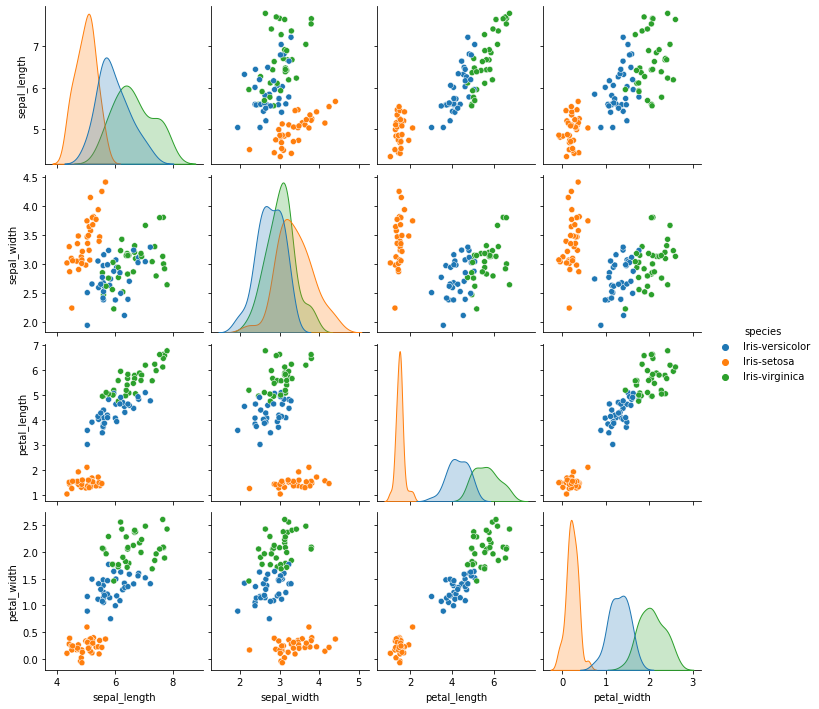

In [152]:
sns.pairplot(df,hue='species')

It's visible that all these three categories of flowers differ in their features dimensions. Depending on the species, the measurements of both petal and sepal have their own range and distribution. As a result, to fill out these missing values, categorical imputation will be used.

## Question 1: Data Exploration
### [CM1] Data Cleaning

In [153]:
# Retreiving all the rows having NaN values:
df[df.isnull().any(axis=1)]

,sepal_length,sepal_width,petal_length,petal_width,species
7,5.205868,NaN,1.675654,0.112269,Iris-setosa
21,6.365979,NaN,4.964905,1.817211,Iris-virginica
30,5.673096,4.409565,NaN,0.370518,Iris-setosa
32,5.847160,2.743619,NaN,0.748681,Iris-versicolor
37,6.271780,2.521065,NaN,1.896626,Iris-virginica
39,5.040516,3.466344,NaN,0.314548,Iris-setosa
41,4.496342,3.098270,NaN,0.242853,Iris-setosa
50,5.817283,2.633800,NaN,1.141347,Iris-versicolor
54,6.265590,NaN,4.701306,1.290187,Iris-versicolor
64,6.340344,NaN,4.302989,1.331797,Iris-versicolor


In [154]:
# Retrieving all the rows with negative values:
df[df.values[:,:4]<0]

,sepal_length,sepal_width,petal_length,petal_width,species
6,4.81174,3.037915,1.494268,-0.042428,Iris-setosa
67,4.86021,3.071128,1.487504,-0.072203,Iris-setosa


As we could see from above, there are 4 missing values from each category of flower, and two measurements in 'Iris-setosa' are negative. There are multiple ways of dealing with missing values, and comparision between two main methods is done to get the best suitable answer:

In [155]:
# Replacing negative values with np.nan:
df.petal_width = np.where(df.petal_width<0, np.nan, df.petal_width)

# Defining  Dataframes for each category of flower:
df_versicolor=df[df.species=='Iris-versicolor']
df_setosa=df[df.species=='Iris-setosa']
df_virginica=df[df.species=='Iris-virginica']

# Handling missing values through median:
df_versicolor_median=df_versicolor.fillna(df_versicolor.median())
df_setosa_median=df_setosa.fillna(df_setosa.median())
df_virginica_median=df_virginica.fillna(df_virginica.median())
df_median= df.copy()
df_median[df_median.species=='Iris-versicolor']=df_versicolor_median
df_median[df_median.species=='Iris-setosa']=df_setosa_median
df_median[df_median.species=='Iris-virginica']=df_virginica_median

# ### Handling missing values through interpolation:
df_versicolor_interpolate=df_versicolor.fillna(df_versicolor.interpolate())
df_setosa_interpolate=df_setosa.fillna(df_setosa.interpolate())
df_virginica_interpolate=df_virginica.fillna(df_virginica.interpolate())
df_interpolate= df.copy()
df_interpolate[df_interpolate.species=='Iris-versicolor']=df_versicolor_interpolate
df_interpolate[df_interpolate.species=='Iris-setosa']=df_setosa_interpolate
df_interpolate[df_interpolate.species=='Iris-virginica']=df_virginica_interpolate

# Comparing the methods to get optimal result:
compare= pd.concat([df.corr(),df_median.corr(),df_interpolate.corr()],keys=['original df corr','median df corr','interpolation df corr'])
compare

sepal_length  sepal_width  petal_length  \
original df corr      sepal_length      1.000000    -0.031792      0.880635   
                      sepal_width      -0.031792     1.000000     -0.285793   
                      petal_length      0.880635    -0.285793      1.000000   
                      petal_width       0.804025    -0.275066      0.957425   
median df corr        sepal_length      1.000000    -0.042971      0.872683   
                      sepal_width      -0.042971     1.000000     -0.330310   
                      petal_length      0.872683    -0.330310      1.000000   
                      petal_width       0.809713    -0.275638      0.955780   
interpolation df corr sepal_length      1.000000    -0.035287      0.870549   
                      sepal_width      -0.035287     1.000000     -0.321562   
                      petal_length      0.870549    -0.321562      1.000000   
                      petal_width       0.809707    -0.262398      0.956214   

                                    petal_width  
original df corr      sepal_length     0.804025  
                      sepal_width     -0.275066  
                      petal_length     0.957425  
                      petal_width      1.000000  
median df corr        sepal_length     0.809713  
                      sepal_width     -0.275638  
                      petal_length     0.955780  
                      petal_width      1.000000  
interpolation df corr sepal_length     0.809707  
                      sepal_width     -0.262398  
                      petal_length     0.956214  
                      petal_width      1.000000

Based on the comparison above, using median() for missing values, correlation becomes strong. While using interpolate(), correlation is effected, but not as great as median(). So, we use median for missing values for further exploration.

In [156]:
df= df_median.copy()
df_setosa= df_setosa_interpolate
df_virginica= df_virginica_interpolate
df_versicolor= df_versicolor_interpolate

#### Effect of Smoothing by Moving Average:

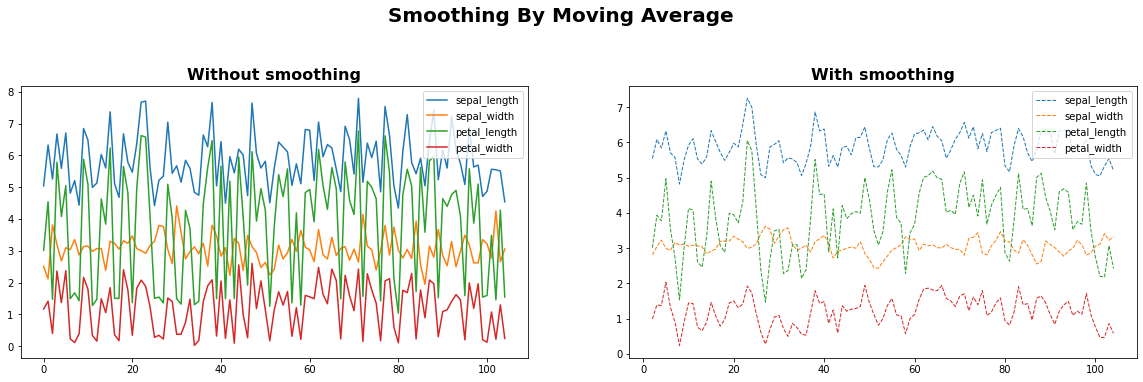

In [157]:
roll=df.rolling(window=3)
smooth_iris=roll.mean()

fig, axes= plt.subplots(1,2,figsize=(20,5))
df.plot(ax=axes[0])
smooth_iris.plot(linestyle='dashed',linewidth=1,ax=axes[1])
axes[0].set_title('Without smoothing',fontsize=16,fontweight='bold')
axes[1].set_title('With smoothing',fontsize=16,fontweight='bold')
plt.suptitle('Smoothing By Moving Average',fontsize=20,fontweight='bold',y=1.1)
plt.show()

Smoothing is used to remove noise from the data, but, in this case, smoothing is not suitable. It provides inaccurate results and may remove the useful data.

### Normalization
Used for rescaling the data in particular range.

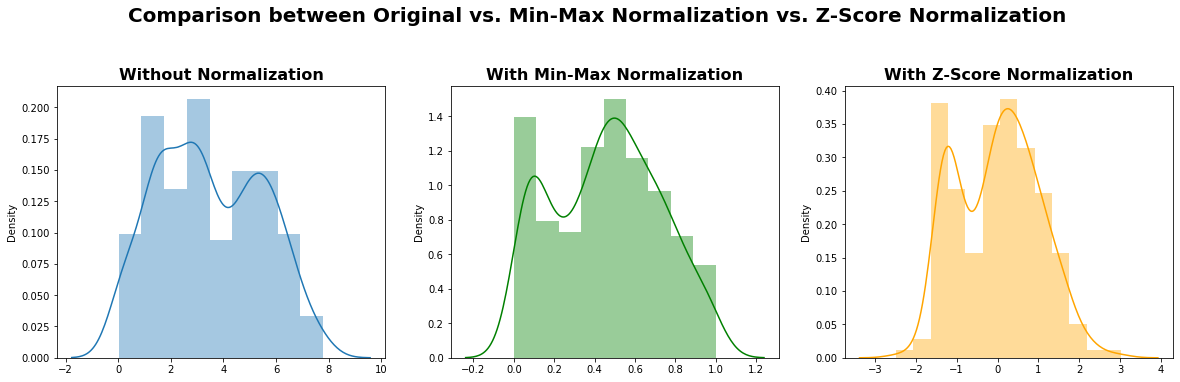

In [158]:
# Min-Max Normalization
scaler=MinMaxScaler()
minmax_norm= scaler.fit_transform(df[['sepal_length','sepal_width','petal_length','petal_width']])
minmax_norm = pd.DataFrame(minmax_norm, columns= df.columns[:4])
minmax_norm['species']= df.species

# Z-Score Normalization
zscore_norm= zscore(df[['sepal_length','sepal_width','petal_length','petal_width']])
zscore_norm = pd.DataFrame(zscore_norm, columns= df.columns[:4])

# Comparison between Original vs. Min-Max Normalization vs. Z-Score Normalization
fig, axes= plt.subplots(1,3,figsize=(20,5))
sns.distplot(df.values[:,:4],ax=axes[0])
sns.distplot(minmax_norm.values[:,:4],ax=axes[1], color='green')
sns.distplot(zscore_norm.values[:,:4],ax=axes[2],color='orange')
axes[0].set_title('Without Normalization',fontsize=16,fontweight='bold')
axes[1].set_title('With Min-Max Normalization',fontsize=16,fontweight='bold')
axes[2].set_title('With Z-Score Normalization',fontsize=16,fontweight='bold')
plt.suptitle('Comparison between Original vs. Min-Max Normalization vs. Z-Score Normalization',fontsize=20,fontweight='bold',y=1.1)
plt.show()

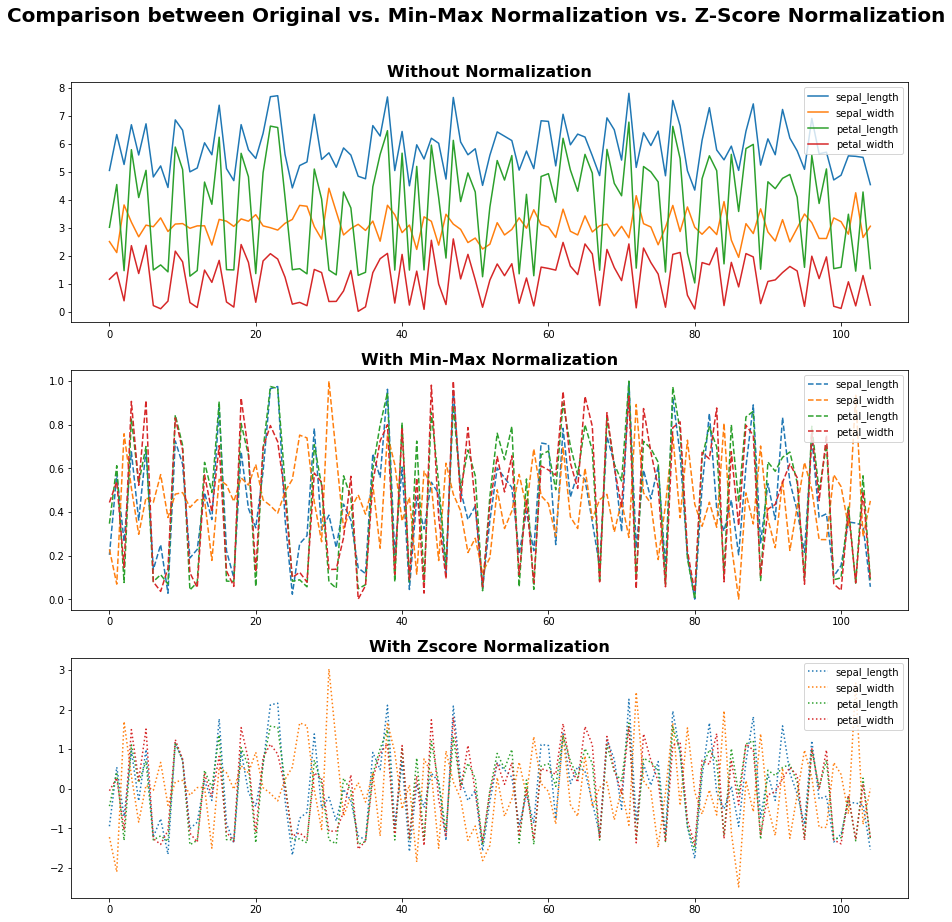

In [159]:
fig, axes= plt.subplots(3,1,figsize=(15,15))
df.plot(ax=axes[0])
minmax_norm.plot(linestyle='dashed',ax=axes[1])
zscore_norm.plot(linestyle='dotted',ax=axes[2])
axes[0].set_title('Without Normalization',fontsize=16,fontweight='bold')
axes[1].set_title('With Min-Max Normalization',fontsize=16,fontweight='bold')
axes[2].set_title('With Zscore Normalization',fontsize=16,fontweight='bold')
plt.suptitle('Comparison between Original vs. Min-Max Normalization vs. Z-Score Normalization',fontsize=20,fontweight='bold',y=0.95)
plt.show()

Based on the comparison above, we will use **Z-Score Normalization** for this dataset, as it handles outliers and provides better accuracy

In [160]:
df.iloc[:,:4]=zscore_norm

### [CM2] Data Visulalization

Text(0.5, 1.05, 'Comparision of Features after Data Cleaning')

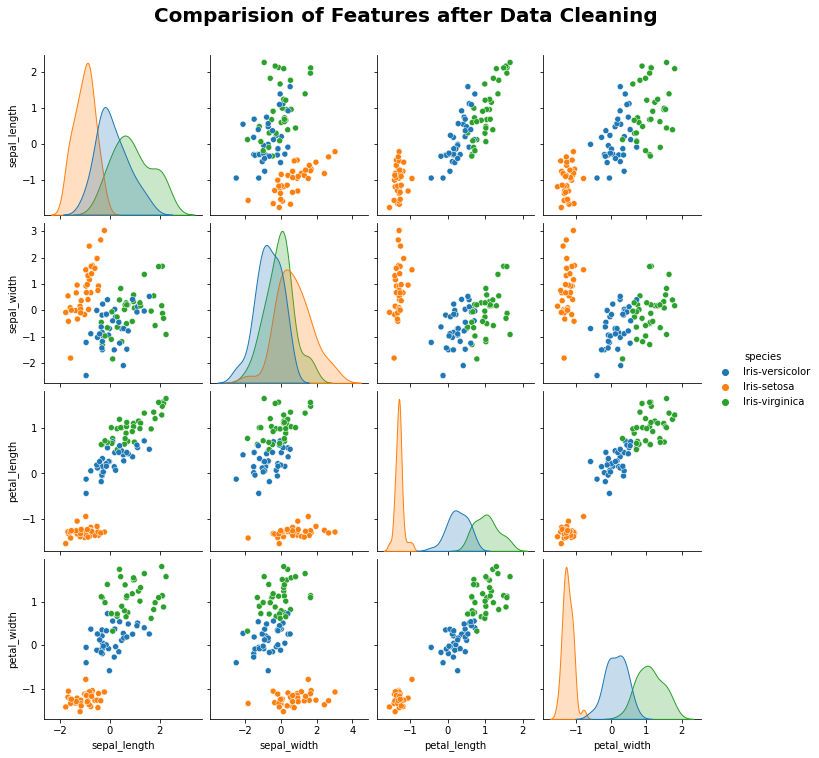

In [161]:
# Pairs Plot
sns.pairplot( df, hue='species')
plt.suptitle('Comparision of Features after Data Cleaning',fontsize=20,y=1.05,fontweight='bold')

#### Correlation Coefficient of All 3 Species:
Based on the plots above, it is quite clear that in general, petal_length and petal_width _(0.96)_ > petal_length and sepal_length _(0.87)_ > petal_width and sepal_length _(0.81)_ has strong positive correlations.

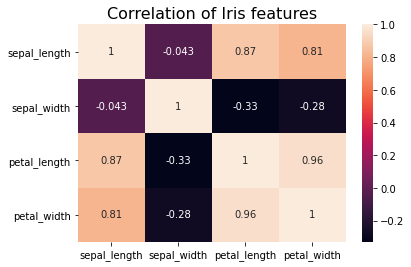

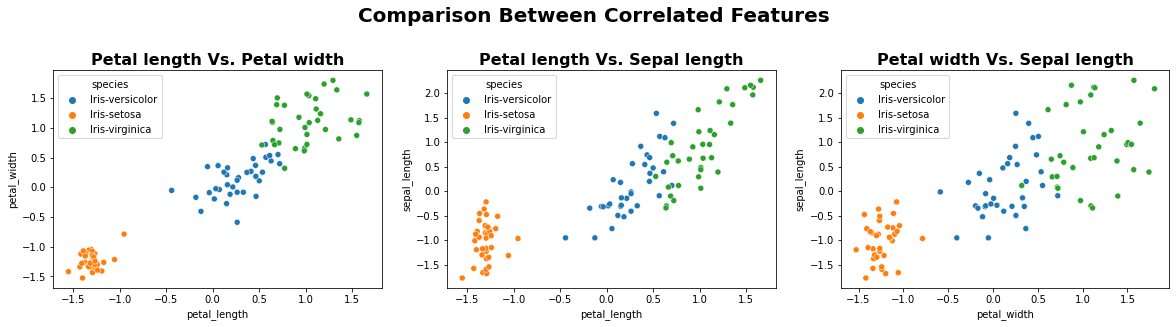

In [162]:
# Correlation Coefficient Heatmap
correlation=df.corr()
sns.heatmap(correlation,annot=True)
plt.title('Correlation of Iris features',fontsize=16)

# Comparison between Correlated Features
fig, axes= plt.subplots(1,3,figsize=(20,4))
sns.scatterplot(df.petal_length,df.petal_width,hue= df.species,ax=axes[0])
sns.scatterplot(df.petal_length,df.sepal_length,hue= df.species,ax=axes[1])
sns.scatterplot(df.petal_width,df.sepal_length,hue= df.species,ax=axes[2])
axes[0].set_title('Petal length Vs. Petal width',fontsize=16,fontweight='bold')
axes[1].set_title('Petal length Vs. Sepal length',fontsize=16,fontweight='bold')
axes[2].set_title('Petal width Vs. Sepal length',fontsize=16,fontweight='bold')
plt.suptitle('Comparison Between Correlated Features',fontsize=20,fontweight='bold',y=1.1)
plt.show()

#### Correlation of Features on Iris-Setosa:
This species has only one feature that is positively correlated, i.e., sepal_width and sepal_length (0.75).

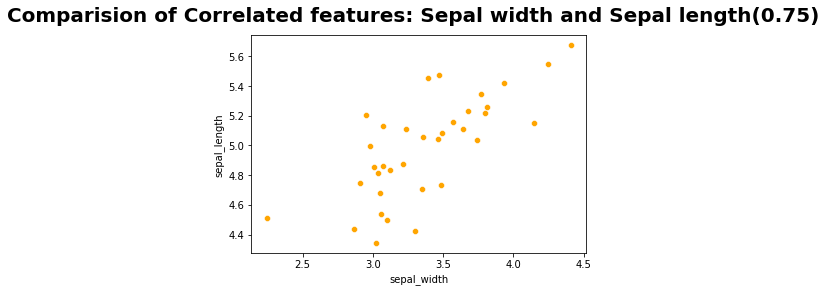

Text(0.5, 1.0, 'Correlation of Iris-Setosa features')

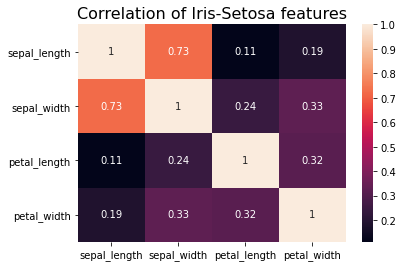

In [163]:
# Scatter Plot of sepal width vs. sepal length for Iris-Setosa
sns.scatterplot(df_setosa.sepal_width,df_setosa.sepal_length,color='orange')
plt.suptitle('Comparision of Correlated features: Sepal width and Sepal length(0.75)',fontsize=20,fontweight='bold')
plt.show()

# Correlation Coefficient Heatmap (Iris-Setosa)
correlation_setosa=df_setosa.corr()
sns.heatmap(correlation_setosa,annot=True)
plt.title('Correlation of Iris-Setosa features',fontsize=16)

#### Correlation of Features on Iris-Virginica:
This species has only one feature that is positively correlated, i.e., petal_length and sepal_length (0.84).

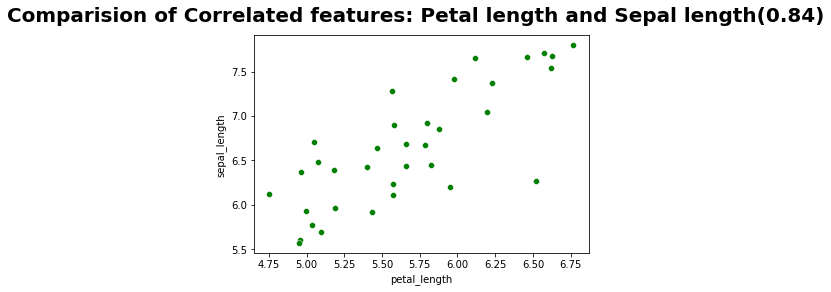

Text(0.5, 1.0, 'Correlation of Iris-Virginica features')

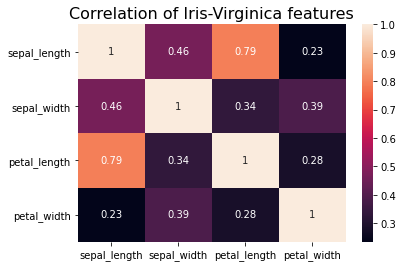

In [164]:
# Scatter Plot of sepal width vs. sepal length for Iris-Virginica
sns.scatterplot(df_virginica.petal_length,df_virginica.sepal_length,color='g')
plt.suptitle('Comparision of Correlated features: Petal length and Sepal length(0.84)',fontsize=20,fontweight='bold')
plt.show()

# Correlation Coefficient Heatmap (Iris-Virginica)
correlation_virginica=df_virginica.corr()
sns.heatmap(correlation_virginica,annot=True)
plt.title('Correlation of Iris-Virginica features',fontsize=16)

#### Correlation of Features on Iris-Versicolor:
This species has two positively correlations, i.e., petal_length and sepal_length (0.77), and the other one is petal_width and petal_length (0.6).

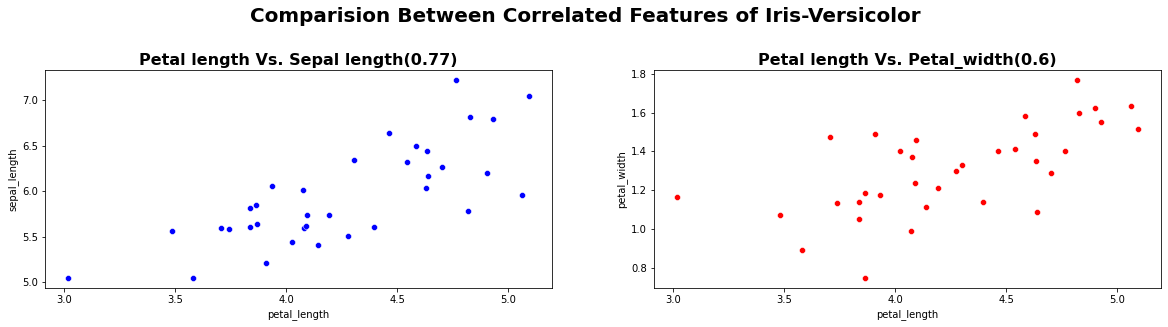

Text(0.5, 1.0, 'Correlation of Iris-versicolor features')

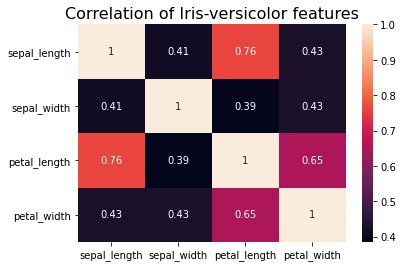

In [165]:
# Scatter Plots of petal_length vs. sepal_length and petal_width vs. petal_length for Iris-Versicolor
fig, axes= plt.subplots(1,2,figsize=(20,4))
sns.scatterplot(df_versicolor.petal_length,df_versicolor.sepal_length,color='b',ax=axes[0])
sns.scatterplot(df_versicolor.petal_length,df_versicolor.petal_width,color='r',ax=axes[1])
axes[0].set_title('Petal length Vs. Sepal length(0.77)',fontsize=16,fontweight='bold')
axes[1].set_title('Petal length Vs. Petal_width(0.6)',fontsize=16,fontweight='bold')
plt.suptitle('Comparision Between Correlated Features of Iris-Versicolor',fontsize=20,fontweight='bold',y=1.1)
plt.show()

# Correlation Coefficient Heatmap (Iris-Versicolor)
correlation_versicolor=df_versicolor.corr()
sns.heatmap(correlation_versicolor,annot=True)
plt.title('Correlation of Iris-versicolor features',fontsize=16)

### [CM3]
#### Correlation Coefficients

Text(0.5, 1.0, 'Correlation of Iris features')

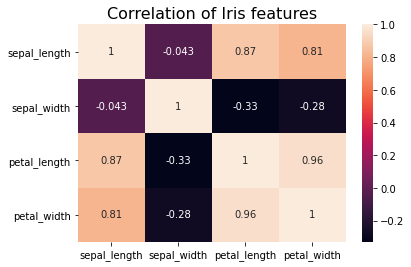

In [166]:
# Correlation Coefficients for All Pairs of Features
correlation=df.corr()
sns.heatmap(correlation,annot=True)
plt.title('Correlation of Iris features',fontsize=16)

In Iris dataset, petal_length and petal_width has very strong correlation (0.96), there is another good correlation between sepal_length and petal_length (0.87), and the correlation between sepal_length and petal_width is also strong (0.81).

All these correlations are positive which means, they have linear and positive relationship as one increases another increments as well. Also, the correlation between different categories of flower, indicates a linear relationship on the data.

#### Mean, Variance, Skew and Kurtosis of Iris Dataset

Mean:
sepal_length    5.858909
sepal_width     3.055949
petal_length    3.806484
petal_width     1.205093
dtype: float64



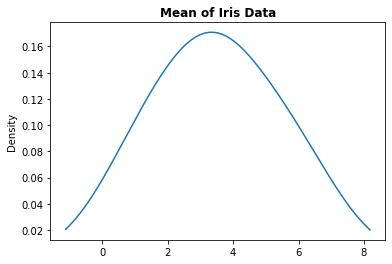

Cateogry Mean:
                 sepal_length  sepal_width  petal_length  petal_width
species                                                              
Iris-setosa          4.987384     3.382670      1.485063     0.245424
Iris-versicolor      5.948732     2.758477      4.282742     1.308528
Iris-virginica       6.640611     3.026700      5.651647     2.061326



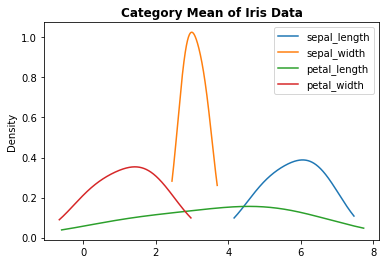

Variance:
sepal_length    0.742420
sepal_width     0.201898
petal_length    3.222815
petal_width     0.607509
dtype: float64



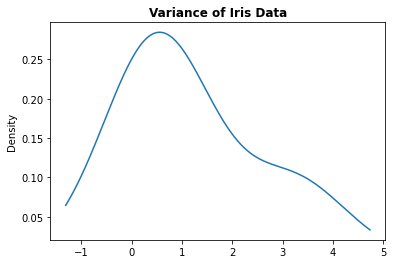

Category Variance:
                 sepal_length  sepal_width  petal_length  petal_width
species                                                              
Iris-setosa          0.118106     0.191651      0.034140     0.012412
Iris-versicolor      0.290830     0.101611      0.231756     0.052308
Iris-virginica       0.442762     0.122449      0.306374     0.079779



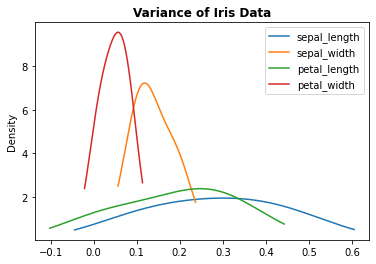

Skew:
sepal_length    0.401506
sepal_width     0.384402
petal_length   -0.258324
petal_width    -0.054162
dtype: float64



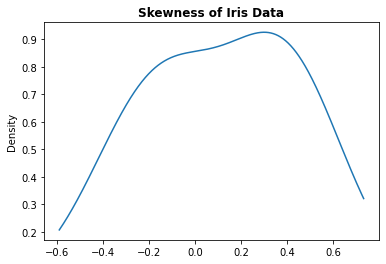

Category Skew:
                 sepal_length  sepal_width  petal_length  petal_width
species                                                              
Iris-setosa         -0.083972     0.200944      0.999313     0.712254
Iris-versicolor      0.556421    -0.421734     -0.372987    -0.255765
Iris-virginica       0.261658     0.158813      0.371726     0.096649



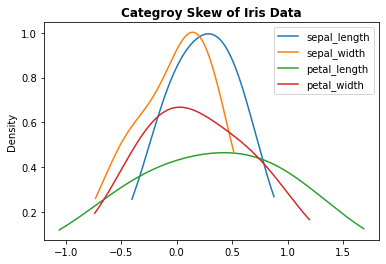

Kurtosis:
sepal_length   -0.544820
sepal_width     0.566680
petal_length   -1.413848
petal_width    -1.330676
dtype: float64



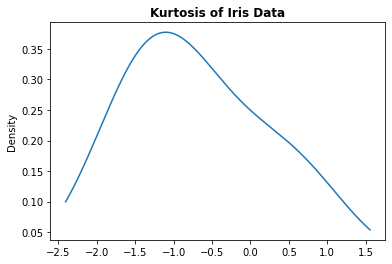

Category Kurtosis:
              iris_setosa  iris_versicolor  iris_virginica
sepal_length    -0.689305        -0.162358       -1.004403
sepal_width      0.539820        -0.044218        0.434558
petal_length     3.756036        -0.342191       -0.938679
petal_width      1.444841        -0.219342       -0.685965



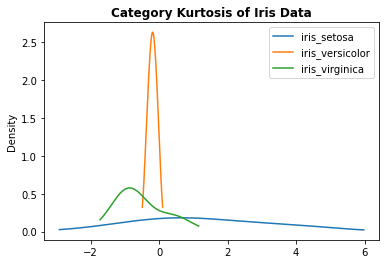

Summarized View on Mean, Variance, Skew and Kurtosis of Iris Data:
                  Mean  Variance      Skew  Kurtosis
sepal_length  5.858909  0.742420  0.401506 -0.544820
sepal_width   3.055949  0.201898  0.384402  0.566680
petal_length  3.806484  3.222815 -0.258324 -1.413848
petal_width   1.205093  0.607509 -0.054162 -1.330676


In [167]:
# Calculation using cleaned data before normalization
# Mean
mean=df_median.mean()
print(f'\033[1mMean:\033[0m\n{mean}\n')
mean.plot(kind='density')
plt.title("Mean of Iris Data",fontweight='bold')
plt.show()
# Category Mean
cat_mean=df_median.groupby('species').mean()
print(f'\033[1mCateogry Mean:\033[0m\n{cat_mean}\n')
cat_mean.plot(kind='density')
plt.title("Category Mean of Iris Data",fontweight='bold')
plt.show()

# Variance
variance=df_median.var()
print(f'\033[1mVariance:\033[0m\n{variance}\n')
variance.plot(kind='density')
plt.title("Variance of Iris Data",fontweight='bold')
plt.show()
# Category Variance
cat_variance=df_median.groupby('species').var()
print(f'\033[1mCategory Variance:\033[0m\n{cat_variance}\n')
cat_variance.plot(kind='density')
plt.title("Variance of Iris Data",fontweight='bold')
plt.show()

# Skew
skew=df_median.skew()
print(f'\033[1mSkew:\033[0m\n{skew}\n')
skew.plot(kind='density')
plt.title("Skewness of Iris Data",fontweight='bold')
plt.show()
# Category Skew
cat_skew=df.groupby('species').skew()
print(f'\033[1mCategory Skew:\033[0m\n{cat_skew}\n')
cat_skew.plot(kind='density')
plt.title("Categroy Skew of Iris Data",fontweight='bold')
plt.show()

# Kurtosis
kurtosis=df_median.kurtosis()
print(f'\033[1mKurtosis:\033[0m\n{kurtosis}\n')
kurtosis.plot(kind='density')
plt.title("Kurtosis of Iris Data",fontweight='bold')
plt.show()
# Category Kurtosis
cat_kurtosis=pd.concat([df_setosa.kurtosis(),df_versicolor.kurtosis(),df_virginica.kurtosis()],axis=1,keys=['iris_setosa','iris_versicolor','iris_virginica'])
print(f'\033[1mCategory Kurtosis:\033[0m\n{cat_kurtosis}\n')
cat_kurtosis.plot(kind='density')
plt.title("Category Kurtosis of Iris Data",fontweight='bold')
plt.show()
# print(f'\033[1mKurtosis:\033[0m\n{kurtosis}\n\n\033[1mCateogry Kurtosis:\033[0m\n{cat_kurtosis}\n')

# Summary
summary=pd.concat([mean,variance,skew,kurtosis],axis=1,keys=['Mean','Variance','Skew','Kurtosis'])
print(f'\033[1mSummarized View on Mean, Variance, Skew and Kurtosis of Iris Data:\033[0m\n{summary}')

##### Discussion

By looking at mean, it represents symmetrical plot, which means data is normally distributed. Also, depicting by categories, flash a light on how different categories of flowers have features on different dimension ranges. It tells that sepal_length is greatest in cm and petal_length is short. Whereas, sepal_width and petal_length are almost of same length in cm.

In variance, the plot shows how spread out the data is. In category plot, it shows that the data in sepal_width and petal_width, the data is less spead out as comparison to sepal_length and petal_length.

As for skew, the data is not skewed to great extent, which means, it has less or no outliers. Even, if we look at the category wise plot, the slowness is not that effected. As, observed by mean it is a symmetrical data, which results in less skewness.

Kurtosis defines the peak sharpness in frequency distribution, so, kurtosis of iris data is not high, but if we look at categorical plot, Iris_setosa has the highest kurtosis among others.

## Question 2: KNN
### 2.1 Dividing Data

In [168]:
# Define features and target for the training
features= zscore_norm
target= df.species
# labelEncoder() is used for multiclass data
target= LabelEncoder().fit_transform(target)

# Question 2.1 Dividing data using train_test_split()
x_train, x_test, y_train, y_test = train_test_split(features,target,test_size=0.2,random_state=98)

### 2.2 [CM4] Training and Testing

In [169]:
knn= KNeighborsClassifier()
knn.fit(x_train,y_train)
predictions= knn.predict(x_test)
original_accuracy=metrics.accuracy_score(y_test,predictions)
print(f"Accuracy of the model is {original_accuracy} using classifier's default parameters.")

Accuracy of the model is 1.0 using classifier's default parameters.


### 2.3
#### 5-Fold Cross Validation

In [170]:
kf_scores = []
kf = KFold()
kf_knn= KNeighborsClassifier()

for train_index, test_index in kf.split(features):
    features_train, features_test = features.iloc[train_index], features.iloc[test_index]
    target_train, target_test = target[train_index], target[test_index]
    kf_knn.fit(features_train,target_train)
    kf_scores.append(metrics.accuracy_score(target_test,knn.predict(features_test)))

# Output results
print(f'The accuracy scores for the 5-fold cross validation is: {kf_scores}\nThe variance of the scores is: {pd.DataFrame({"accuracy":kf_scores}).var().accuracy}')

The accuracy scores for the 5-fold cross validation is: [1.0, 1.0, 0.9523809523809523, 0.9047619047619048, 1.0]
The variance of the scores is: 0.0018140589569161


#### [CM5] Accuracy vs. k Plot
The variance for the k-fold cross validation is __0.001814__ with detailed scores listed above.

,Accuracy Rate
k=1,0.923810
k=5,0.952381
k=10,0.933333
k=15,0.904762
k=20,0.876190
k=25,0.876190
k=30,0.885714
k=35,0.895238


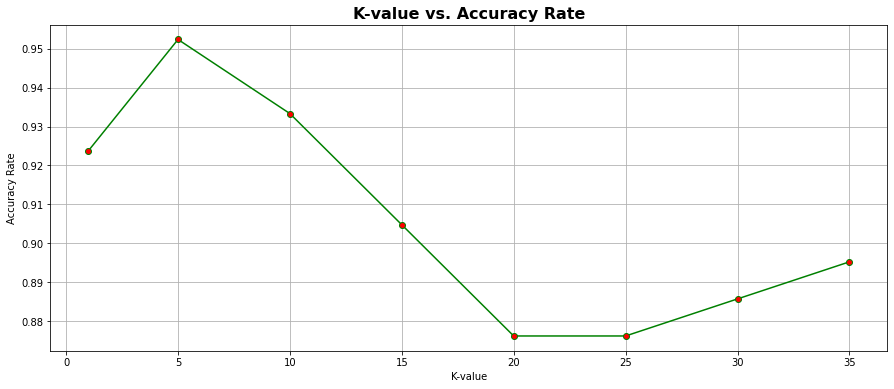

In [171]:
scores=[]
scores_with_iterations=[]
r=[1,5,10,15,20,25,30,35]
for i in r:
    knn= KNeighborsClassifier(n_neighbors=i)
    score= cross_val_score(knn,features,target,cv=5)
    scores.append(score.mean())
    scores_with_iterations.append(score)

plt.figure(figsize=(15,6))
plt.plot(r,scores,marker='o',markerfacecolor='r',color='g')
plt.xlabel("K-value")
plt.ylabel("Accuracy Rate")
plt.title("K-value vs. Accuracy Rate", fontsize=16, fontweight='bold')
plt.grid()

scores = pd.DataFrame(scores,index=["k=1","k=5","k=10","k=15","k=20","k=25","k=30","k=35"],columns=["Accuracy Rate"])
scores

##### Variations of k Parameter:

In [172]:
scores_with_iterations=pd.DataFrame(scores_with_iterations,index=["k=1","k=5","k=10","k=15","k=20","k=25","k=30","k=35"],columns=["1 iteration",
                                "2 iteration","3 iteration","4 iteration","5 iteration"])
scores_with_iterations

,1 iteration,2 iteration,3 iteration,4 iteration,5 iteration
k=1,0.857143,0.952381,0.952381,0.904762,0.952381
k=5,0.952381,0.952381,0.952381,0.952381,0.952381
k=10,0.952381,0.904762,0.904762,0.952381,0.952381
k=15,0.952381,0.857143,0.809524,0.952381,0.952381
k=20,0.952381,0.857143,0.809524,0.904762,0.857143
k=25,0.952381,0.857143,0.809524,0.904762,0.857143
k=30,1.000000,0.857143,0.809524,0.904762,0.857143
k=35,1.000000,0.857143,0.809524,0.952381,0.857143


##### Accuracy with best k parameter

In [173]:
knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
predictions= knn.predict(x_test)
k_accuracy=metrics.accuracy_score(y_test,predictions)
k_accuracy

1.0

##### Discussion
- K-fold Validation Scores: 1.0, 1.0, 0.9523809523809523, 0.9047619047619048, 1.0
- Scores Variance: 0.0018140589569161

K-fold cross validation, in this data splits into k number of folds and iteration is performed on each one of it. It is like using all the data for training and testing. It allows to train the model on multiple train_test_splits. Therefore, it is more suitable for smaller datasets like this Iris dataset.

On the other hand, test_validate_test allows to train the model on a single train_test_split, depending upon the given sample ratio of dataset. So it is preferred on a larger dataset.

Although, k-fold cross validation method improves the performance over train_validate_test but again, it depends upon the nature of data to be applied upon. 

In given dataset also, k-fold validation provided more accurate results with respect to actual test set. But, in train_validate_test, the accuracy of validation set and actual model differs.

#### [CM6] Evaluation of KNN model:
##### Confusion matrix is used for determining performance of classification model

Text(0.5, 1.5, 'Confusion Matrix')

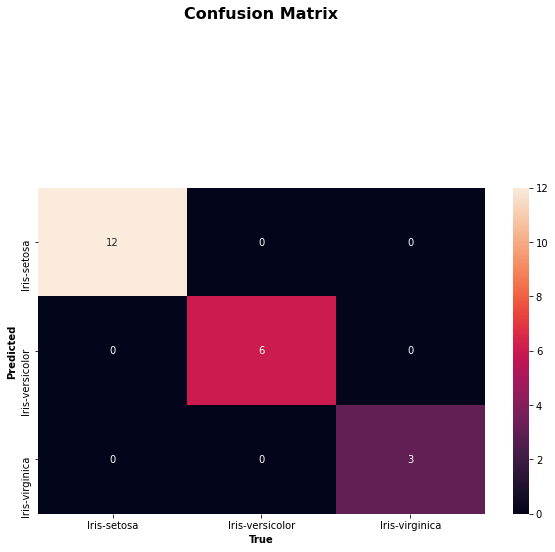

In [174]:
cm= confusion_matrix(y_test,predictions)
cm=pd.DataFrame(cm, index= ['Iris-setosa','Iris-versicolor','Iris-virginica'],
                columns=['Iris-setosa','Iris-versicolor','Iris-virginica'])
cm

plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True)
plt.xlabel('True',fontweight='bold')
plt.ylabel('Predicted',fontweight='bold')
plt.title('Confusion Matrix', fontsize=16,fontweight='bold', y= 1.5)

##### Classification report is used to determine the precision, recall and f1-score

In [175]:
cr=classification_report(y_test,predictions,output_dict=True)
cr= pd.DataFrame(cr)
cr

,0,1,2,accuracy,macro avg,weighted avg
precision,1.0,1.0,1.0,1.0,1.0,1.0
recall,1.0,1.0,1.0,1.0,1.0,1.0
f1-score,1.0,1.0,1.0,1.0,1.0,1.0
support,12.0,6.0,3.0,1.0,21.0,21.0


##### AUC and f-score:

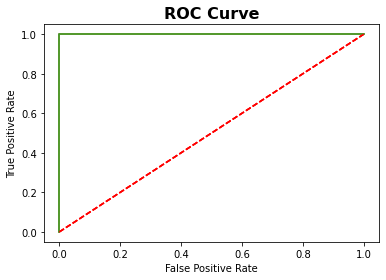

The AUC for the model is 1.0, and f-score is 1.0.


In [176]:
fpr={}
tpr={}
roc_auc={}
thresh={}
for i in range(3):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test,knn.predict_proba(x_test)[:,i],pos_label=i)
    roc_auc[i]=auc(fpr[i],tpr[i])
# ROC Plot
plt.figure()
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=" AUC : %0.2f"% roc_auc[i])
    plt.plot((0,1),'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC Curve',fontweight='bold',fontsize=16)
plt.show()
# AUC
auc=roc_auc_score(y_test,knn.predict_proba(x_test),multi_class='ovr',average='macro')
# f-score
f1score= metrics.f1_score(y_test,predictions,average='macro')

# Output
print(f'The AUC for the model is {auc}, and f-score is {f1score}.')

##### Discussion
- Accuracy: correctly predicted observations to total observations.
- F-score: it is the harmonic mean of precision and recall of a model.
- Precision: the ratio of true positive observation to total positive observations.
- Recall: the ratio of true positive observation to all the observations.

F-score, precision, and recall improves with improvement in accuracy. As for AUC, it is the probability of the fit model scoring randomly drawn positives higher than the randomly drawn negatives. So, as the accuracy improves it also improves. In addition, different results of roc curve before improvement and after improvement, also shows the impact on accuracy.

Changing k leads to change in accuracy result, whether it increases or decreases, that varies from dataset to dataset. As, in KNN classification technique, k represents the number of nearest neighbor's among which model has to predict the class of input provided. In our case, the accuracy with default parameters (k=5) is already 1 i.e., 100% accurate model. Also, it can be seen in validation set graph that maximum accuracy is achieved at k =5.

The increase in doesn't always affect the accuracy, some times it stays same. Example, in our dataset, accuracies at k= 20 and k= 25 are the same, whereas, at other k values it may decrease or increase. It happens because when k value reach a certain point where data is smoothed to maximum extent, it will be the same value. It also happens, once 1 accuracy is achieved.

When k=1, training set is at center of area of different classes, but increasing k will smooth the area predicting each class. Therefore, it results into area containing less number, in simple shapes and large sizes.

### Improved Model:

#### 2.5 Weighted KNN
Effect of changing weight to 'distance' (default is 'uniform') and different distance metrics (default is 'minkowski').

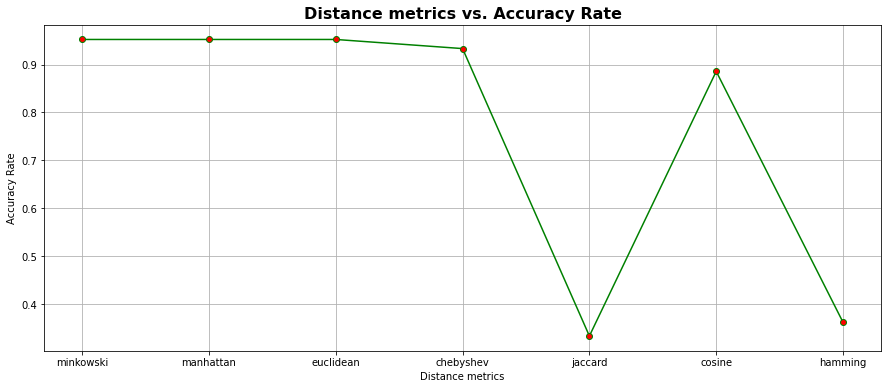

In [177]:
w_accuracy=[]
met= ['minkowski','manhattan','euclidean','chebyshev','jaccard','cosine','hamming']
for i in met:
    knn= KNeighborsClassifier(n_neighbors=5,weights='distance',metric=i)
    score= cross_val_score(knn,features,target,cv=5)
    w_accuracy.append(score.mean())

plt.figure(figsize=(15,6))
plt.plot(met,w_accuracy,marker='o',markerfacecolor='r',color='g')
plt.xlabel("Distance metrics")
plt.ylabel("Accuracy Rate")
plt.title("Distance metrics vs. Accuracy Rate", fontsize=16, fontweight='bold')
plt.grid()
w_accuracy = pd.DataFrame(w_accuracy,index=met,columns=['accuracy rate'])

#### 2.6 Different KNN Algorithms

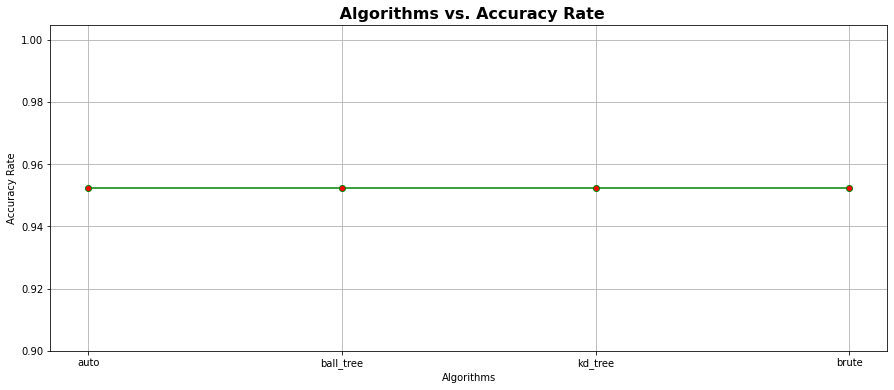

In [178]:
alg_accuracy=[]
alg= ['auto','ball_tree','kd_tree','brute']
for i in alg:
    knn= KNeighborsClassifier(n_neighbors=5,weights='distance',metric='euclidean',algorithm=i)
    score= cross_val_score(knn,features,target,cv=5)
    alg_accuracy.append(score.mean())

plt.figure(figsize=(15,6))
plt.plot(alg,alg_accuracy,marker='o',markerfacecolor='r',color='g')
plt.xlabel("Algorithms")
plt.ylabel("Accuracy Rate")
plt.title(" Algorithms vs. Accuracy Rate", fontsize=16, fontweight='bold')
plt.grid()

#### 2.7 [CM7] Report on accuracy, AUC and f-score

In [179]:
report2=pd.DataFrame({'Evaluation Report':['F-Score','AUC','Accuracy'], 'Value':[f1score,auc,k_accuracy]})
report2

,Evaluation Report,Value
0,F-Score,1.0
1,AUC,1.0
2,Accuracy,1.0
